In [1]:
import os 
import sys

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

start = (0, 0)
goal = (5, 5)

path_a = [start, (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), goal]
path_b = [start, (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), goal]
path_c = [start, (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (4, 4), (5, 4), (5, 5), goal]


print(cosine_similarity([path_a], [path_b]))
print(cosine_similarity([path_a], [path_c]))
print(cosine_similarity([path_b], [path_c]))

ValueError: Found array with dim 3. check_pairwise_arrays expected <= 2.

DTW Similarity (path_a vs path_b): 18.56296860470214
Cosine Similarity (path_a vs path_b): 0.39804896992221994
Edit Distance Similarity (path_a vs path_b): 33
DTW Similarity (path_a vs path_c): 5.0
Cosine Similarity (path_a vs path_c): 0.4293148314346895
Edit Distance Similarity (path_a vs path_c): 30
DTW Similarity (path_b vs path_c): 21.213203435596427
Cosine Similarity (path_b vs path_c): 0.8931132464781438
Edit Distance Similarity (path_b vs path_c): 18


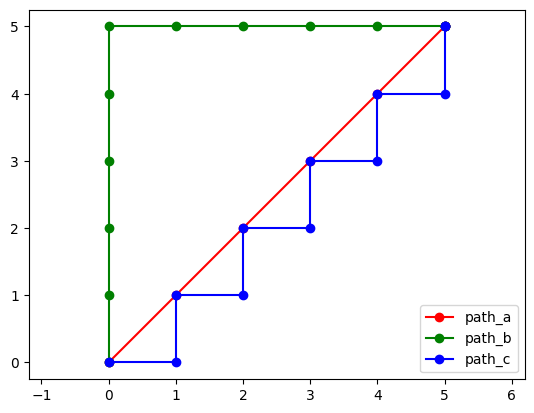

In [6]:
import numpy as np
from scipy.spatial.distance import cosine
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from Levenshtein import distance as levenshtein_distance

def dtw_similarity(path1, path2):
    """
    ダイナミックタイムワーピング（DTW）で経路間の類似度を計算。
    path1, path2: それぞれ座標点列をリストとして渡す。
    """
    distance, _ = fastdtw(path1, path2, dist=euclidean)
    return distance

def cosine_similarity(path1, path2):
    """
    経路間のコサイン類似度を計算。
    path1, path2: それぞれ座標点列を平坦化した1次元配列に変換して渡す。
    """
    # パスを平坦化し、同じ次元に揃える
    path1_flat = np.ravel(path1)
    path2_flat = np.ravel(path2)
    max_len = max(len(path1_flat), len(path2_flat))
    path1_flat = np.pad(path1_flat, (0, max_len - len(path1_flat)))
    path2_flat = np.pad(path2_flat, (0, max_len - len(path2_flat)))
    return 1 - cosine(path1_flat, path2_flat)

def edit_distance_similarity(path1, path2):
    """
    経路間の編集距離を計算。
    path1, path2: 座標列をタプルのリストとして渡す。
    """
    # 座標を文字列化して編集距離を計算
    str_path1 = ''.join(map(str, path1))
    str_path2 = ''.join(map(str, path2))
    return levenshtein_distance(str_path1, str_path2)

start = (0, 0)
goal = (5, 5)

# テスト用経路データ(最大12ステップ)
path_a = [start, (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), goal]
path_b = [start, (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), goal]
path_c = [start, (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (4, 4), (5, 4), (5, 5), goal]

# 類似度計算のテスト
print("DTW Similarity (path_a vs path_b):", dtw_similarity(path_a, path_b))
print("Cosine Similarity (path_a vs path_b):", cosine_similarity(path_a, path_b))
print("Edit Distance Similarity (path_a vs path_b):", edit_distance_similarity(path_a, path_b))

print("DTW Similarity (path_a vs path_c):", dtw_similarity(path_a, path_c))
print("Cosine Similarity (path_a vs path_c):", cosine_similarity(path_a, path_c))
print("Edit Distance Similarity (path_a vs path_c):", edit_distance_similarity(path_a, path_c))

print("DTW Similarity (path_b vs path_c):", dtw_similarity(path_b, path_c))
print("Cosine Similarity (path_b vs path_c):", cosine_similarity(path_b, path_c))
print("Edit Distance Similarity (path_b vs path_c):", edit_distance_similarity(path_b, path_c))

# 経路を描画
import matplotlib.pyplot as plt

def plot_path(path, color='b'):
    x, y = zip(*path)
    plt.plot(x, y, color=color, marker='o')
    plt.axis('equal')

plt.figure()
plot_path(path_a, color='r')
plot_path(path_b, color='g')
plot_path(path_c, color='b')
plt.legend(['path_a', 'path_b', 'path_c'])
plt.show()

Normalized DTW (path_a vs path_b): 1.4279206619001645
Normalized DTW (path_a vs path_c): 0.38461538461538464
Normalized DTW (path_b vs path_c): 1.6317848796612635


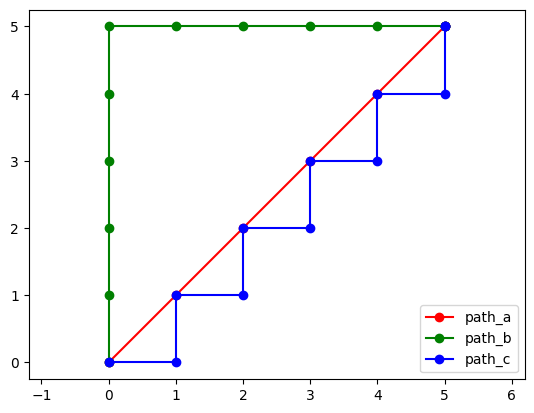

In [7]:
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

def normalized_dtw(path1, path2):
    """
    正規化されたDynamic Time Warping（DTW）距離を計算する。
    path1, path2: それぞれ座標点列をリストとして渡す。
    """
    # DTW距離と経路長を計算
    dtw_distance, path_length = fastdtw(path1, path2, dist=euclidean)
    # 正規化: 経路長で割る
    normalized_distance = dtw_distance / len(path_length)
    return normalized_distance

# テスト用経路データ
start = (0, 0)
goal = (5, 5)

# テスト用経路データ(最大12ステップ)
path_a = [start, (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), goal]
path_b = [start, (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), goal]
path_c = [start, (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (4, 4), (5, 4), (5, 5), goal]

# 正規化DTWの計算
print("Normalized DTW (path_a vs path_b):", normalized_dtw(path_a, path_b))
print("Normalized DTW (path_a vs path_c):", normalized_dtw(path_a, path_c))
print("Normalized DTW (path_b vs path_c):", normalized_dtw(path_b, path_c))

# 経路を描画
import matplotlib.pyplot as plt

def plot_path(path, color='b'):
    x, y = zip(*path)
    plt.plot(x, y, color=color, marker='o')
    plt.axis('equal')

plt.figure()
plot_path(path_a, color='r')
plot_path(path_b, color='g')
plot_path(path_c, color='b')
plt.legend(['path_a', 'path_b', 'path_c'])
plt.show()


Normalized DTW Distance (path_a vs path_b): 1.5469140503918448
Normalized DTW Distance (path_a vs path_c): 0.4166666666666667
Normalized DTW Distance (path_b vs path_c): 1.7677669529663689
Similarity Score (path_a vs path_b): 0.3926320167129901
Similarity Score (path_a vs path_c): 0.7058823529411764
Similarity Score (path_b vs path_c): 0.36130209551358533


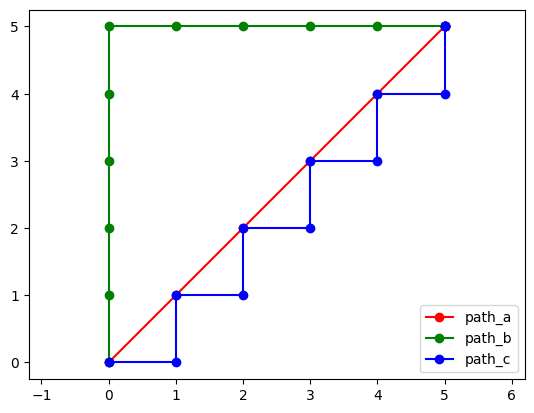

In [11]:
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

def normalized_dtw_distance(path1, path2):
    """
    DTW距離を経路の平均長で正規化する。
    """
    # DTW距離の計算
    dtw_distance, _ = fastdtw(path1, path2, dist=euclidean)
    
    # 経路長の平均を計算
    avg_path_length = (len(path1) + len(path2)) / 2
    
    # 正規化されたDTW距離
    normalized_distance = dtw_distance / avg_path_length
    return normalized_distance

def similarity_score_from_dtw(path1, path2):
    """
    正規化されたDTW距離を0～1の類似度スコアに変換する。
    """
    normalized_distance = normalized_dtw_distance(path1, path2)
    # 距離を類似度スコアに変換（値が小さいほどスコアは1に近づく）
    similarity_score = 1 / (1 + normalized_distance)
    return similarity_score

# テスト用経路データ
# テスト用経路データ
start = (0, 0)
goal = (5, 5)

# テスト用経路データ(最大12ステップ)
path_a = [start, (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), goal, goal, goal, goal, goal, goal] 
path_b = [start, (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), goal]
path_c = [start, (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (4, 4), (5, 4), (5, 5), goal]

# 正規化DTW距離の計算
print("Normalized DTW Distance (path_a vs path_b):", normalized_dtw_distance(path_a, path_b))
print("Normalized DTW Distance (path_a vs path_c):", normalized_dtw_distance(path_a, path_c))
print("Normalized DTW Distance (path_b vs path_c):", normalized_dtw_distance(path_b, path_c))

# 類似度スコアの計算
print("Similarity Score (path_a vs path_b):", similarity_score_from_dtw(path_a, path_b))
print("Similarity Score (path_a vs path_c):", similarity_score_from_dtw(path_a, path_c))
print("Similarity Score (path_b vs path_c):", similarity_score_from_dtw(path_b, path_c))

# 経路を描画
import matplotlib.pyplot as plt

def plot_path(path, color='b'):
    x, y = zip(*path)
    plt.plot(x, y, color=color, marker='o')
    plt.axis('equal')

plt.figure()
plot_path(path_a, color='r')
plot_path(path_b, color='g')
plot_path(path_c, color='b')
plt.legend(['path_a', 'path_b', 'path_c'])
plt.show()

In [1]:
dic1 = {1: [10, 20], 2: [20, 30]}
dic2 = {3: [30, 40], 4: [40, 50]}
dic1.update(dic2)
print(dic1)

{1: [10, 20], 2: [20, 30], 3: [30, 40], 4: [40, 50]}


In [1]:
from sklearn.metrics.pairwise import cosine_similarity

a = [10, 20]
b = [30, 40]
print(cosine_similarity([a], [b]))

[[0.98386991]]


In [11]:
import random
weights = {1: 0, 2: 0, 3: 1.0, 4: 0.0}
id, l = random.choices(list(dic1.items()), weights=list(weights.values()))[0]
print(id, l)

3 [30, 40]


In [8]:
size = 2
class test:
    def __init__(self, novelty):
        self.fitness = 0
        self.novelty = novelty

    def __str__(self) -> str:
        return f"fitness: {self.fitness}, novelty: {self.novelty}"

archive = {1: test(40), 2: test(20), 3: test(50), 4: test(60)}

archive = dict(sorted(archive.items(), key=lambda x: x[1].novelty, reverse=True)[:size])
for key, value in archive.items():
    print(key, value)

4 fitness: 0, novelty: 60
3 fitness: 0, novelty: 50


In [11]:
best = archive
print(best)

KeyError: 0

In [2]:
CURR_DIR = os.path.dirname(os.path.realpath("__file__"))
ROOT_DIR = os.path.abspath(os.path.join(CURR_DIR))
LIB_DIR = os.path.join(ROOT_DIR, 'libs')
sys.path.append(LIB_DIR)

In [3]:
import kan_neat

In [4]:
config_file = os.path.join(ROOT_DIR, 'test_kan.cfg')
config = kan_neat.make_config(config_file)
node_gene = kan_neat.genes.DefaultNodeGene(0)
node_gene.init_attributes(config.genome_config)
print(node_gene)
print(node_gene.get_config_params())

DefaultNodeGene(key=0, response=1.0, aggregation=sum)
[ConfigParameter('response_init_mean', <class 'float'>), ConfigParameter('response_init_stdev', <class 'float'>), ConfigParameter('response_init_type', <class 'str'>, 'gaussian'), ConfigParameter('response_replace_rate', <class 'float'>), ConfigParameter('response_mutate_rate', <class 'float'>), ConfigParameter('response_mutate_power', <class 'float'>), ConfigParameter('response_max_value', <class 'float'>), ConfigParameter('response_min_value', <class 'float'>), ConfigParameter('response_num_points', <class 'int'>, 1), ConfigParameter('aggregation_default', <class 'str'>, 'random'), ConfigParameter('aggregation_options', <class 'list'>, 'sum'), ConfigParameter('aggregation_mutate_rate', <class 'float'>)]


In [10]:
genome = kan_neat.genome.DefaultGenome(0)
genome.configure_new(config.genome_config)
print(genome)

Key: 0
Fitness: None
Nodes:
	0 DefaultNodeGene(key=0, response=1.0, aggregation=sum)
	1 DefaultNodeGene(key=1, response=1.0, aggregation=sum)
	2 DefaultNodeGene(key=2, response=1.0, aggregation=sum)
	3 DefaultNodeGene(key=3, response=1.0, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 1), ws=1.0, wb=-0.09838167439302534, ctp=[0.0001163818277044523, 0.00011588388887982687, -6.454450657402075e-06, 8.961433065284056e-05, -6.570012183100583e-05, -0.000125224383578215, -2.2292736709239355e-05, -0.00010962193118590776, -1.4601583687487849e-05, -2.2575217340350293e-05], enabled=True)
	DefaultConnectionGene(key=(-2, 2), ws=1.0, wb=-0.23147802278481897, ctp=[3.0329801334516155e-05, 0.0001269947203569048, 5.957713900264259e-05, -0.00012265106206451492, -0.00012298791122906786, 4.00078688601795e-05, -2.9371673174871227e-05, 4.927879443730137e-06, -4.430600392083391e-05, 1.3584375878071909e-05], enabled=True)
	DefaultConnectionGene(key=(-2, 3), ws=1.0, wb=0.010355557103134018, ctp=[

	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct


In [18]:
import numpy as np
l2 = 0.0
for cg in genome.connections.values():
    print(sum(np.array(cg.ctp)**2))
    l2 += sum(np.array(cg.ctp)**2)
    # l2 += cg.wb**2 + cg.ws**2
    print(l2)

1.051415971813329e-07
1.051415971813329e-07
7.545071825178272e-08
1.8059231543311562e-07
8.870918642010164e-08
2.6930150185321724e-07
6.828062655560141e-08
3.375821284088187e-07
5.5401466676368835e-08
3.929835950851875e-07
9.53617156903e-08
4.883453107754876e-07
1.8296912420550666e-07
6.713144349809943e-07
1.1604048616367434e-07
7.873549211446686e-07
1.1046617049957738e-07
8.97821091644246e-07


In [20]:
l2 = 0.0
for cg in genome.connections.values():
    print(sum(np.diff(cg.ctp)**2))
    l2 += sum(np.diff(cg.ctp)**2)
    print(l2)

2.8287347410070115e-07
2.8287347410070115e-07
1.2181101215592036e-07
4.046844862566215e-07
1.7012097642045832e-07
5.748054626770798e-07
7.917560230059565e-08
6.539810649776754e-07
8.542934341094447e-08
7.394104083886199e-07
2.1500356164989906e-07
9.54413970038519e-07
4.819115351313481e-07
1.4363255051698672e-06
1.4529509081673555e-07
1.5816205959866027e-06
1.2197180812520208e-07
1.7035924041118048e-06


In [19]:
a = [1, 2, 3, 5, 6]
np.diff(a)

array([1, 1, 2, 1])

In [6]:
gene1 = kan_neat.genes.DefaultConnectionGene((0, 1))
gene1.init_attributes(config.genome_config)
gene2 = kan_neat.genes.DefaultConnectionGene((0, 1))
gene2.init_attributes(config.genome_config)

In [7]:
print(gene1)

DefaultConnectionGene(key=(0, 1), ws=1.0, wb=-0.09233173303366388, ctp=[-0.00011626380575978841, -5.8427800432775204e-05, 5.33126663285235e-05, 5.546630100899608e-05, -5.756917969753066e-05, 8.718341296630526e-05, -0.00010637526245497085, 7.268399580772158e-05, 1.815904270123866e-05, 2.009778469002579e-05], enabled=True)


In [8]:
print(gene2)

DefaultConnectionGene(key=(0, 1), ws=1.0, wb=-0.0673044541370758, ctp=[4.0926008083356956e-05, 8.07184770822191e-05, -3.3105133269612026e-06, -0.00010509805710300114, 0.00011625454997344775, -0.00018673696249263752, -2.605476504041162e-05, 2.2321631251930483e-05, -0.00010315326123372579, -2.3217650481296345e-05], enabled=True)


In [9]:
gene3 = gene1.crossover(gene2)
print(gene3)

DefaultConnectionGene(key=(0, 1), ws=1.0, wb=-0.0673044541370758, ctp=[-0.00011626380575978841, -5.8427800432775204e-05, 5.33126663285235e-05, -0.00010509805710300114, 0.00011625454997344775, 8.718341296630526e-05, -0.00010637526245497085, 7.268399580772158e-05, 1.815904270123866e-05, 2.009778469002579e-05], enabled=True)


In [10]:
genome1 = kan_neat.genome.DefaultGenome(0)
genome1.configure_new(config.genome_config)
genome1.fitness = 0.5
print(genome1)

Key: 0
Fitness: 0.5
Nodes:
	0 DefaultNodeGene(key=0, response=1.0, aggregation=sum)
	1 DefaultNodeGene(key=1, response=1.0, aggregation=sum)
	2 DefaultNodeGene(key=2, response=1.0, aggregation=sum)
	3 DefaultNodeGene(key=3, response=1.0, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 1), ws=1.0, wb=0.01814281174456604, ctp=[0.0001372897003825283, 3.51264469995597e-05, -7.227295262366603e-07, 4.929272465508991e-05, 0.000100856674670187, -0.00011462977164706192, -1.091961188447958e-05, 0.00021408280410925974, -3.73398925066594e-05, -6.802193007262534e-05], enabled=True)
	DefaultConnectionGene(key=(-2, 2), ws=1.0, wb=-0.04629921777225411, ctp=[-4.905345226965481e-06, -9.528794429682781e-05, 7.77563979196527e-07, 9.073349679670198e-05, -0.0002463316685318282, 0.00014599762296139555, 0.00014577692737629587, -5.343247128253609e-05, 4.3212458491033875e-05, 0.00011649857224831724], enabled=True)
	DefaultConnectionGene(key=(-2, 3), ws=1.0, wb=0.06125760111765787, ctp=[-5.57457488

	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct


In [11]:
genome2 = kan_neat.genome.DefaultGenome(1)
genome2.configure_new(config.genome_config)
genome2.fitness = 0.6
print(genome2)  

Key: 1
Fitness: 0.6
Nodes:
	0 DefaultNodeGene(key=0, response=1.0, aggregation=sum)
	4 DefaultNodeGene(key=4, response=1.0, aggregation=sum)
	5 DefaultNodeGene(key=5, response=1.0, aggregation=sum)
	6 DefaultNodeGene(key=6, response=1.0, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 4), ws=1.0, wb=0.002756657449072312, ctp=[2.5206105019933663e-05, 8.949855302761656e-05, -6.557088420751688e-05, -3.949315726111828e-06, -8.20507852869751e-06, -4.221826424733741e-05, 0.0003199949390995027, -4.08146029839662e-05, -0.00012597031130958782, 9.488630926498375e-05], enabled=True)
	DefaultConnectionGene(key=(-2, 5), ws=1.0, wb=-0.022538768038712378, ctp=[0.00014708927177899933, -8.434795912712872e-05, -8.132122907694401e-05, -0.00014870731554105472, 8.871248056908008e-05, 0.00023856504556137557, 0.00010879060631168207, -0.00010905778286672575, 7.13450559723636e-05, 0.00010906297688137593], enabled=True)
	DefaultConnectionGene(key=(-2, 6), ws=1.0, wb=-0.12699487502938697, ctp=[-0.0

	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct


In [12]:
child = kan_neat.genome.DefaultGenome(2)
child.configure_crossover(genome1, genome2, config.genome_config)
print(child)

Key: 2
Fitness: None
Nodes:
	0 DefaultNodeGene(key=0, response=1.0, aggregation=sum)
	4 DefaultNodeGene(key=4, response=1.0, aggregation=sum)
	5 DefaultNodeGene(key=5, response=1.0, aggregation=sum)
	6 DefaultNodeGene(key=6, response=1.0, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 4), ws=1.0, wb=0.002756657449072312, ctp=[2.5206105019933663e-05, 8.949855302761656e-05, -6.557088420751688e-05, -3.949315726111828e-06, -8.20507852869751e-06, -4.221826424733741e-05, 0.0003199949390995027, -4.08146029839662e-05, -0.00012597031130958782, 9.488630926498375e-05], enabled=True)
	DefaultConnectionGene(key=(-2, 5), ws=1.0, wb=-0.022538768038712378, ctp=[0.00014708927177899933, -8.434795912712872e-05, -8.132122907694401e-05, -0.00014870731554105472, 8.871248056908008e-05, 0.00023856504556137557, 0.00010879060631168207, -0.00010905778286672575, 7.13450559723636e-05, 0.00010906297688137593], enabled=True)
	DefaultConnectionGene(key=(-2, 6), ws=1.0, wb=-0.12699487502938697, ctp=[-0.

In [13]:
child.mutate(config.genome_config)
print(child)

Key: 2
Fitness: None
Nodes:
	0 DefaultNodeGene(key=0, response=1.0, aggregation=sum)
	4 DefaultNodeGene(key=4, response=1.0, aggregation=sum)
	5 DefaultNodeGene(key=5, response=1.0, aggregation=sum)
	6 DefaultNodeGene(key=6, response=1.0, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 4), ws=0.9087263859924686, wb=-0.35309805708830855, ctp=[-0.17541741676906666, 3.0205465374829943e-05, 0.0009755619775843498, -0.12300739059725026, -8.20507852869751e-06, -4.221826424733741e-05, 0.06824799733872194, 0.1664647464866212, -0.021067651723564066, 9.488630926498375e-05], enabled=True)
	DefaultConnectionGene(key=(-2, 5), ws=1.0, wb=-0.054799981013536433, ctp=[0.19121579828814536, -8.434795912712872e-05, -8.132122907694401e-05, 0.08945618126863565, 8.871248056908008e-05, -0.11398309404193956, 0.00010879060631168207, -0.00010905778286672575, 0.14787634680381787, 0.13494026971423645], enabled=True)
	DefaultConnectionGene(key=(-2, 6), ws=1.4455207094074376, wb=-0.12699487502938697, ct

In [14]:
conf = kan_neat.make_config(config_file)
pop = kan_neat.Population(conf)
print(pop)

Population of 3 individuals
Key: 1
Fitness: None
Nodes:
	0 DefaultNodeGene(key=0, response=1.0, aggregation=sum)
	1 DefaultNodeGene(key=1, response=1.0, aggregation=sum)
	2 DefaultNodeGene(key=2, response=1.0, aggregation=sum)
	3 DefaultNodeGene(key=3, response=1.0, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 1), ws=1.0, wb=0.09679558453613311, ctp=[1.3090474408590869e-05, -0.00013326372772765917, -0.00012491817481574474, 3.4762016396443783e-05, -0.00012545274456290926, 7.84914348648054e-05, -0.00010694843655698192, -0.00034922826861090125, 7.444661842327114e-05, 6.705697314705018e-05], enabled=True)
	DefaultConnectionGene(key=(-2, 2), ws=1.0, wb=-0.1610890914814852, ctp=[-8.658584669649605e-05, 2.5830374830451564e-05, 0.0001853032950038873, 5.769092032654048e-05, 5.820699694744009e-05, 0.0001086185570588605, 0.0002632308186065173, 7.269329617247121e-05, 4.244289237691956e-06, -8.906226455264148e-05], enabled=True)
	DefaultConnectionGene(key=(-2, 3), ws=1.0, wb=0.0971

	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct


In [15]:
print(genome1)

Key: 0
Fitness: 0.5
Nodes:
	0 DefaultNodeGene(key=0, response=1.0, aggregation=sum)
	1 DefaultNodeGene(key=1, response=1.0, aggregation=sum)
	2 DefaultNodeGene(key=2, response=1.0, aggregation=sum)
	3 DefaultNodeGene(key=3, response=1.0, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 1), ws=1.0, wb=0.01814281174456604, ctp=[0.0001372897003825283, 3.51264469995597e-05, -7.227295262366603e-07, 4.929272465508991e-05, 0.000100856674670187, -0.00011462977164706192, -1.091961188447958e-05, 0.00021408280410925974, -3.73398925066594e-05, -6.802193007262534e-05], enabled=True)
	DefaultConnectionGene(key=(-2, 2), ws=1.0, wb=-0.04629921777225411, ctp=[-4.905345226965481e-06, -9.528794429682781e-05, 7.77563979196527e-07, 9.073349679670198e-05, -0.0002463316685318282, 0.00014599762296139555, 0.00014577692737629587, -5.343247128253609e-05, 4.3212458491033875e-05, 0.00011649857224831724], enabled=True)
	DefaultConnectionGene(key=(-2, 3), ws=1.0, wb=0.06125760111765787, ctp=[-5.57457488

In [16]:
connections = [cg.key for cg in genome1.connections.values() if cg.enabled]
layers = kan_neat.graphs.feed_forward_layers(conf.genome_config.input_keys, conf.genome_config.output_keys, connections)

In [17]:
network = kan_neat.FeedForwardNetwork.create(genome1, conf.genome_config)

In [18]:
test_input = [1.0, 0.2]
output = network.activate(test_input)
print(output)

[1.7598714288191861]


In [1]:
import numpy as np
node_num = [3, 4, 2, 6, 2, 2, 2, 2, 7, 2]
connection_num = [8, 9, 5, 13, 5, 5, 5, 5, 14, 5]

print(np.mean(node_num)-1)
print(np.mean(connection_num))

2.2
7.4


In [2]:
node_num = [3, 3, 3, 4, 8, 5, 3, 3, 5, 3]
connection_num = [6, 6, 6, 9, 13, 11, 7, 7, 11, 6]

print(np.mean(node_num)-1)
print(np.mean(connection_num))

3.0
8.2


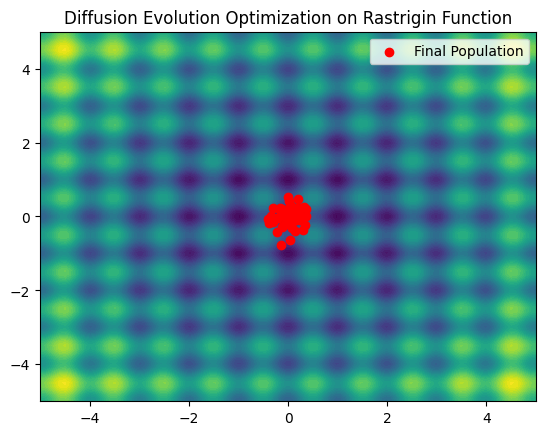

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Rastrigin関数の定義
def rastrigin(X):
    A = 10
    return A * len(X) + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in X])

# DEAの設定
def diffusion_evolution(pop_size, dim, generations, fitness_func, alpha_schedule, sigma):
    # 初期化
    population = np.random.randn(pop_size, dim)
    for t in range(generations):
        fitness_scores = np.array([fitness_func(ind) for ind in population])
        alpha_t = alpha_schedule(t, generations)
        # 重み付き平均の計算
        Z = np.sum([np.exp(-fitness_scores[j]) for j in range(pop_size)])
        new_population = []
        for i in range(pop_size):
            neighbors = np.random.choice(range(pop_size), size=pop_size//2, replace=False)
            weighted_avg = np.sum([population[j] * np.exp(-fitness_scores[j]) for j in neighbors], axis=0) / Z
            noise = np.random.randn(dim) * sigma
            new_ind = alpha_t * weighted_avg + (1 - alpha_t) * population[i] + noise
            new_population.append(new_ind)
        population = np.array(new_population)
    return population

# パラメータ設定
pop_size = 50       # 集団サイズ
dim = 2             # 次元
generations = 100   # 世代数
sigma = 0.1         # ノイズの大きさ

# アルファのスケジュール（線形減衰）
def alpha_schedule(t, generations):
    return 1 - t / generations

# DEAを実行
final_population = diffusion_evolution(pop_size, dim, generations, rastrigin, alpha_schedule, sigma)

# 結果の可視化
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = np.array([rastrigin([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.scatter(final_population[:, 0], final_population[:, 1], color='red', label='Final Population')
plt.title('Diffusion Evolution Optimization on Rastrigin Function')
plt.legend()
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


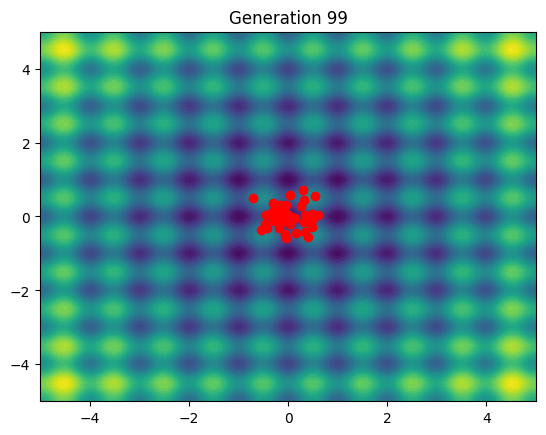

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Rastrigin関数の定義（テスト用の最適化問題）
def rastrigin(X):
    A = 10
    return A * len(X) + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in X])

# DEAアルゴリズムの実装
def diffusion_evolution(pop_size, dim, generations, fitness_func, alpha_schedule, sigma):
    # 初期化 - 集団をランダムに初期化
    population = np.random.randn(pop_size, dim) * 10.0 + 3.0  # 初期集団は正規分布から生成
    all_generations = []  # 全世代のデータを保存するリスト
    
    for t in range(generations):
        # フィットネス評価 - 各個体のフィットネススコアを計算
        fitness_scores = np.array([fitness_func(ind) for ind in population])
        
        # 現在の世代におけるアルファ値を取得
        alpha_t = alpha_schedule(t, generations)
        
        # 重み付き平均の計算のために、正規化定数Zを計算
        Z = np.sum([np.exp(-fitness_scores[j]) for j in range(pop_size)])
        
        new_population = []  # 新しい個体群を保存するリスト
        
        # 各個体を次の世代に向けて進化させる
        for i in range(pop_size):
            # 近傍の個体をランダムに選択して、推定する高フィットネス個体の計算
            neighbors = np.random.choice(range(pop_size), size=pop_size//2, replace=False)
            
            # 重み付き平均に基づいて高フィットネス解を推定
            weighted_avg = np.sum([population[j] * np.exp(-fitness_scores[j]) for j in neighbors], axis=0) / Z
            
            # ランダムなノイズを加えて新しい個体を生成
            noise = np.random.randn(dim) * sigma
            new_ind = alpha_t * weighted_avg + (1 - alpha_t) * population[i] + noise
            
            # 新しい個体を次世代の集団に追加
            new_population.append(new_ind)
        
        # 現在の世代の集団を保存
        population = np.array(new_population)
        for ind in population:
            all_generations.append([t, ind[0], ind[1]])
    
    # データをPandas DataFrameに変換しCSVに保存
    df = pd.DataFrame(all_generations, columns=['Generation', 'X', 'Y'])
    df.to_csv('gen.csv', index=False)
    
    return population

# パラメータ設定
pop_size = 50       # 集団サイズ（個体数）
dim = 2             # 次元（Rastrigin関数は2次元で実行）
generations = 100   # 世代数（進化のステップ数）
sigma = 0.1         # ノイズの大きさ（突然変異の大きさ）

# アルファのスケジュール（時間経過とともに探索範囲を狭める）
def alpha_schedule(t, generations):
    return 1 - t / generations  # 線形にアルファ値を減らす

# DEAを実行して最適化を行う
final_population = diffusion_evolution(pop_size, dim, generations, rastrigin, alpha_schedule, sigma)

# CSVファイルの読み込み
df = pd.read_csv('gen.csv')

# GIF作成のための可視化関数を定義
fig, ax = plt.subplots()
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = np.array([rastrigin([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

# 初期設定の描画
ax.contourf(X, Y, Z, levels=50, cmap='viridis')
scat = ax.scatter([], [], color='red')

# 更新関数
def update(frame):
    current_gen = df[df['Generation'] == frame]
    scat.set_offsets(current_gen[['X', 'Y']].values)
    ax.set_title(f'Generation {frame}')
    return scat,

# アニメーションを作成
ani = FuncAnimation(fig, update, frames=range(generations), repeat=False)

# GIFとして保存
ani.save('diffusion_evolution.gif', writer='imagemagick')

plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


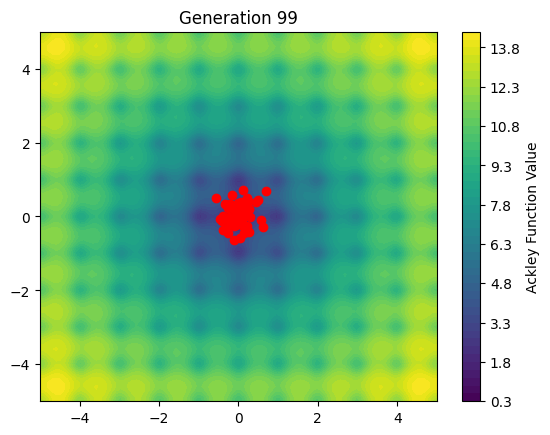

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Ackley関数の定義（テスト用の最適化問題）
def ackley(X):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(X)
    sum1 = -a * np.exp(-b * np.sqrt(sum([x**2 for x in X]) / d))
    sum2 = -np.exp(sum([np.cos(c * x) for x in X]) / d)
    return sum1 + sum2 + a + np.exp(1)

# DEAアルゴリズムの実装
def diffusion_evolution(pop_size, dim, generations, fitness_func, alpha_schedule, sigma):
    # 初期化 - 集団をランダムに初期化
    population = np.random.randn(pop_size, dim)*10 + 3  # 初期集団は正規分布から生成
    all_generations = []  # 全世代のデータを保存するリスト
    
    for t in range(generations):
        # フィットネス評価 - 各個体のフィットネススコアを計算
        fitness_scores = np.array([fitness_func(ind) for ind in population])
        
        # 現在の世代におけるアルファ値を取得
        alpha_t = alpha_schedule(t, generations)
        
        # 重み付き平均の計算のために、正規化定数Zを計算
        Z = np.sum([np.exp(-fitness_scores[j]) for j in range(pop_size)])
        
        new_population = []  # 新しい個体群を保存するリスト
        
        # 各個体を次の世代に向けて進化させる
        for i in range(pop_size):
            # 近傍の個体をランダムに選択して、推定する高フィットネス個体の計算
            neighbors = np.random.choice(range(pop_size), size=pop_size//2, replace=False)
            
            # 重み付き平均に基づいて高フィットネス解を推定
            weighted_avg = np.sum([population[j] * np.exp(-fitness_scores[j]) for j in neighbors], axis=0) / Z
            
            # ランダムなノイズを加えて新しい個体を生成
            noise = np.random.randn(dim) * sigma
            new_ind = alpha_t * weighted_avg + (1 - alpha_t) * population[i] + noise
            
            # 新しい個体を次世代の集団に追加
            new_population.append(new_ind)
        
        # 現在の世代の集団を保存
        population = np.array(new_population)
        for ind in population:
            all_generations.append([t, ind[0], ind[1]])
    
    # データをPandas DataFrameに変換しCSVに保存
    df = pd.DataFrame(all_generations, columns=['Generation', 'X', 'Y'])
    df.to_csv('gen.csv', index=False)
    
    return population

# パラメータ設定
pop_size = 50       # 集団サイズ（個体数）
dim = 2             # 次元（Ackley関数は2次元で実行）
generations = 100   # 世代数（進化のステップ数）
sigma = 0.1         # ノイズの大きさ（突然変異の大きさ）

# アルファのスケジュール（時間経過とともに探索範囲を狭める）
def alpha_schedule(t, generations):
    return 1 - t / generations  # 線形にアルファ値を減らす

# DEAを実行して最適化を行う
final_population = diffusion_evolution(pop_size, dim, generations, ackley, alpha_schedule, sigma)

# CSVファイルの読み込み
df = pd.read_csv('gen.csv')

# GIF作成のための可視化関数を定義
fig, ax = plt.subplots()
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = np.array([ackley([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

# 初期設定の描画
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
scat = ax.scatter([], [], color='red')

# カラーバーを追加
cbar = fig.colorbar(contour)
cbar.set_label('Ackley Function Value')

# 更新関数
def update(frame):
    current_gen = df[df['Generation'] == frame]
    scat.set_offsets(current_gen[['X', 'Y']].values)
    ax.set_title(f'Generation {frame}')
    return scat,

# アニメーションを作成
ani = FuncAnimation(fig, update, frames=range(generations), repeat=False)

# GIFとして保存
ani.save('diffusion_evolution_ackley.gif', writer='imagemagick')

plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


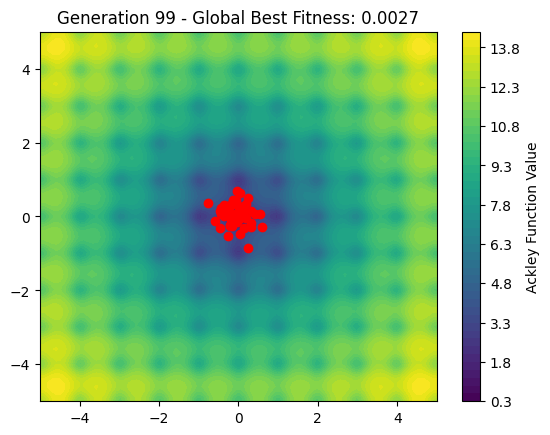

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Ackley関数の定義（テスト用の最適化問題）
def ackley(X):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(X)
    sum1 = -a * np.exp(-b * np.sqrt(sum([x**2 for x in X]) / d))
    sum2 = -np.exp(sum([np.cos(c * x) for x in X]) / d)
    return sum1 + sum2 + a + np.exp(1)

# DEAアルゴリズムの実装
def diffusion_evolution(pop_size, dim, generations, fitness_func, alpha_schedule, sigma):
    # 初期化 - 集団をランダムに初期化
    population = np.random.randn(pop_size, dim)*20 * 3  # 初期集団は正規分布から生成
    all_generations = []  # 全世代のデータを保存するリスト
    
    for t in range(generations):
        # フィットネス評価 - 各個体のフィットネススコアを計算
        fitness_scores = np.array([fitness_func(ind) for ind in population])
        
        # 現在の世代におけるアルファ値を取得
        alpha_t = alpha_schedule(t, generations)
        
        # 重み付き平均の計算のために、正規化定数Zを計算
        Z = np.sum([np.exp(-fitness_scores[j]) for j in range(pop_size)])
        
        new_population = []  # 新しい個体群を保存するリスト
        
        # 各個体を次の世代に向けて進化させる
        for i in range(pop_size):
            # 近傍の個体をランダムに選択して、推定する高フィットネス個体の計算
            neighbors = np.random.choice(range(pop_size), size=pop_size//2, replace=False)
            
            # 重み付き平均に基づいて高フィットネス解を推定
            weighted_avg = np.sum([population[j] * np.exp(-fitness_scores[j]) for j in neighbors], axis=0) / Z
            
            # ランダムなノイズを加えて新しい個体を生成
            noise = np.random.randn(dim) * sigma
            new_ind = alpha_t * weighted_avg + (1 - alpha_t) * population[i] + noise
            
            # 新しい個体を次世代の集団に追加
            new_population.append(new_ind)
        
        # 現在の世代の集団を保存
        population = np.array(new_population)
        for ind in population:
            all_generations.append([t, ind[0], ind[1], fitness_func(ind)])  # フィットネススコアも保存
    
    # データをPandas DataFrameに変換しCSVに保存
    df = pd.DataFrame(all_generations, columns=['Generation', 'X', 'Y', 'Fitness'])
    df.to_csv('gen.csv', index=False)
    
    return population

# パラメータ設定
pop_size = 50       # 集団サイズ（個体数）
dim = 2             # 次元（Ackley関数は2次元で実行）
generations = 100   # 世代数（進化のステップ数）
sigma = 0.1         # ノイズの大きさ（突然変異の大きさ）

# アルファのスケジュール（時間経過とともに探索範囲を狭める）
def alpha_schedule(t, generations):
    return 1 - t / generations  # 線形にアルファ値を減らす

# DEAを実行して最適化を行う
final_population = diffusion_evolution(pop_size, dim, generations, ackley, alpha_schedule, sigma)

# CSVファイルの読み込み
df = pd.read_csv('gen.csv')

# GIF作成のための可視化関数を定義
fig, ax = plt.subplots()
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = np.array([ackley([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

# 初期設定の描画
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
scat = ax.scatter([], [], color='red')

# カラーバーを追加
cbar = fig.colorbar(contour)
cbar.set_label('Ackley Function Value')

# グローバルベストを追跡する変数
global_best = np.inf

# 更新関数
def update(frame):
    global global_best
    current_gen = df[df['Generation'] == frame]
    current_best = current_gen['Fitness'].min()
    
    # 各世代までのグローバルベストを更新
    if current_best < global_best:
        global_best = current_best
    
    # 現在の世代の個体をプロット
    scat.set_offsets(current_gen[['X', 'Y']].values)
    
    # タイトルを世代数とグローバルベストの値に更新
    ax.set_title(f'Generation {frame} - Global Best Fitness: {global_best:.4f}')
    
    return scat,

# アニメーションを作成
ani = FuncAnimation(fig, update, frames=range(generations), repeat=False)

# GIFとして保存
ani.save('diffusion_evolution_ackley_with_global_best.gif', writer='imagemagick')

plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


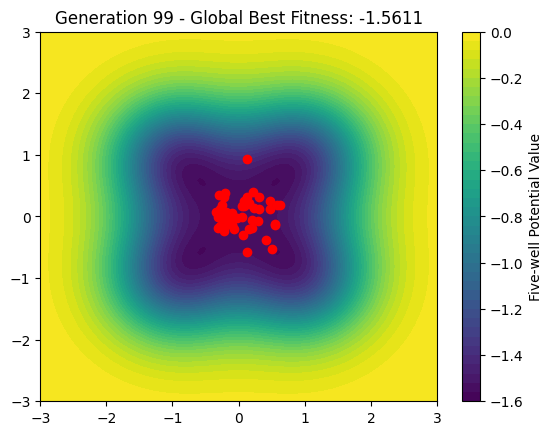

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Five-well potential functionの定義
def five_well_potential(X):
    x, y = X[0], X[1]
    term1 = np.exp(-((x - 1)**2 + (y - 1)**2))
    term2 = np.exp(-((x + 1)**2 + (y - 1)**2))
    term3 = np.exp(-((x - 1)**2 + (y + 1)**2))
    term4 = np.exp(-((x + 1)**2 + (y + 1)**2))
    term5 = np.exp(-0.5 * (x**2 + y**2))
    return - (term1 + term2 + term3 + term4 + term5)

# DEAアルゴリズムの実装
def diffusion_evolution(pop_size, dim, generations, fitness_func, alpha_schedule, sigma):
    # 初期化 - 集団をランダムに初期化
    population = np.random.randn(pop_size, dim)*20+3  # 初期集団は正規分布から生成
    all_generations = []  # 全世代のデータを保存するリスト
    
    for t in range(generations):
        # フィットネス評価 - 各個体のフィットネススコアを計算
        fitness_scores = np.array([fitness_func(ind) for ind in population])
        
        # 現在の世代におけるアルファ値を取得
        alpha_t = alpha_schedule(t, generations)
        
        # 重み付き平均の計算のために、正規化定数Zを計算
        Z = np.sum([np.exp(-fitness_scores[j]) for j in range(pop_size)])
        
        new_population = []  # 新しい個体群を保存するリスト
        
        # 各個体を次の世代に向けて進化させる
        for i in range(pop_size):
            # 近傍の個体をランダムに選択して、推定する高フィットネス個体の計算
            neighbors = np.random.choice(range(pop_size), size=pop_size//2, replace=False)
            
            # 重み付き平均に基づいて高フィットネス解を推定
            weighted_avg = np.sum([population[j] * np.exp(-fitness_scores[j]) for j in neighbors], axis=0) / Z
            
            # ランダムなノイズを加えて新しい個体を生成
            noise = np.random.randn(dim) * sigma
            new_ind = alpha_t * weighted_avg + (1 - alpha_t) * population[i] + noise
            
            # 新しい個体を次世代の集団に追加
            new_population.append(new_ind)
        
        # 現在の世代の集団を保存
        population = np.array(new_population)
        for ind in population:
            all_generations.append([t, ind[0], ind[1], fitness_func(ind)])  # フィットネススコアも保存
    
    # データをPandas DataFrameに変換しCSVに保存
    df = pd.DataFrame(all_generations, columns=['Generation', 'X', 'Y', 'Fitness'])
    df.to_csv('gen.csv', index=False)
    
    return population

# パラメータ設定
pop_size = 50       # 集団サイズ（個体数）
dim = 2             # 次元（Five-well potential functionは2次元で実行）
generations = 100   # 世代数（進化のステップ数）
sigma = 0.1         # ノイズの大きさ（突然変異の大きさ）

# アルファのスケジュール（時間経過とともに探索範囲を狭める）
def alpha_schedule(t, generations):
    return 1 - t / generations  # 線形にアルファ値を減らす

# DEAを実行して最適化を行う
final_population = diffusion_evolution(pop_size, dim, generations, five_well_potential, alpha_schedule, sigma)

# CSVファイルの読み込み
df = pd.read_csv('gen.csv')

# GIF作成のための可視化関数を定義
fig, ax = plt.subplots()
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = np.array([five_well_potential([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

# 初期設定の描画
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
scat = ax.scatter([], [], color='red')

# カラーバーを追加
cbar = fig.colorbar(contour)
cbar.set_label('Five-well Potential Value')

# グローバルベストを追跡する変数
global_best = np.inf

# 更新関数
def update(frame):
    global global_best
    current_gen = df[df['Generation'] == frame]
    current_best = current_gen['Fitness'].min()
    
    # 各世代までのグローバルベストを更新
    if current_best < global_best:
        global_best = current_best
    
    # 現在の世代の個体をプロット
    scat.set_offsets(current_gen[['X', 'Y']].values)
    
    # タイトルを世代数とグローバルベストの値に更新
    ax.set_title(f'Generation {frame} - Global Best Fitness: {global_best:.4f}')
    
    return scat,

# アニメーションを作成
ani = FuncAnimation(fig, update, frames=range(generations), repeat=False)

# GIFとして保存
ani.save('diffusion_evolution_five_well_potential_with_global_best.gif', writer='imagemagick')

plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


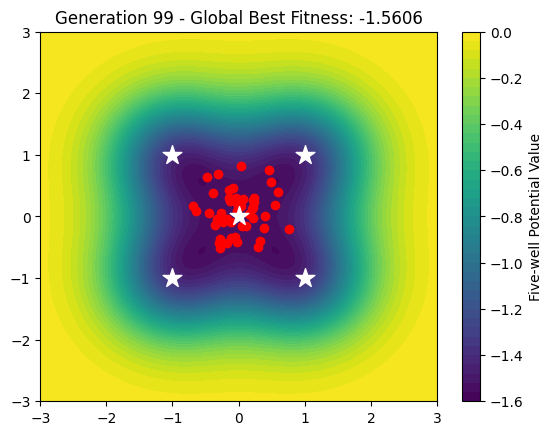

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Five-well potential functionの定義
def five_well_potential(X):
    x, y = X[0], X[1]
    term1 = np.exp(-((x - 1)**2 + (y - 1)**2))
    term2 = np.exp(-((x + 1)**2 + (y - 1)**2))
    term3 = np.exp(-((x - 1)**2 + (y + 1)**2))
    term4 = np.exp(-((x + 1)**2 + (y + 1)**2))
    term5 = np.exp(-0.5 * (x**2 + y**2))
    return - (term1 + term2 + term3 + term4 + term5)

# DEAアルゴリズムの実装
def diffusion_evolution(pop_size, dim, generations, fitness_func, alpha_schedule, sigma):
    # 初期化 - 集団をランダムに初期化
    population = np.random.randn(pop_size, dim)  # 初期集団は正規分布から生成
    all_generations = []  # 全世代のデータを保存するリスト
    
    for t in range(generations):
        # フィットネス評価 - 各個体のフィットネススコアを計算
        fitness_scores = np.array([fitness_func(ind) for ind in population])
        
        # 現在の世代におけるアルファ値を取得
        alpha_t = alpha_schedule(t, generations)
        
        # 重み付き平均の計算のために、正規化定数Zを計算
        Z = np.sum([np.exp(-fitness_scores[j]) for j in range(pop_size)])
        
        new_population = []  # 新しい個体群を保存するリスト
        
        # 各個体を次の世代に向けて進化させる
        for i in range(pop_size):
            # 近傍の個体をランダムに選択して、推定する高フィットネス個体の計算
            neighbors = np.random.choice(range(pop_size), size=pop_size//2, replace=False)
            
            # 重み付き平均に基づいて高フィットネス解を推定
            weighted_avg = np.sum([population[j] * np.exp(-fitness_scores[j]) for j in neighbors], axis=0) / Z
            
            # ランダムなノイズを加えて新しい個体を生成
            noise = np.random.randn(dim) * sigma
            new_ind = alpha_t * weighted_avg + (1 - alpha_t) * population[i] + noise
            
            # 新しい個体を次世代の集団に追加
            new_population.append(new_ind)
        
        # 現在の世代の集団を保存
        population = np.array(new_population)
        for ind in population:
            all_generations.append([t, ind[0], ind[1], fitness_func(ind)])  # フィットネススコアも保存
    
    # データをPandas DataFrameに変換しCSVに保存
    df = pd.DataFrame(all_generations, columns=['Generation', 'X', 'Y', 'Fitness'])
    df.to_csv('gen.csv', index=False)
    
    return population

# パラメータ設定
pop_size = 50       # 集団サイズ（個体数）
dim = 2             # 次元（Five-well potential functionは2次元で実行）
generations = 100   # 世代数（進化のステップ数）
sigma = 0.1         # ノイズの大きさ（突然変異の大きさ）

# アルファのスケジュール（時間経過とともに探索範囲を狭める）
def alpha_schedule(t, generations):
    return 1 - t / generations  # 線形にアルファ値を減らす

# DEAを実行して最適化を行う
final_population = diffusion_evolution(pop_size, dim, generations, five_well_potential, alpha_schedule, sigma)

# CSVファイルの読み込み
df = pd.read_csv('gen.csv')

# GIF作成のための可視化関数を定義
fig, ax = plt.subplots()
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = np.array([five_well_potential([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

# 最適解の座標 (1, 1), (-1, 1), (1, -1), (-1, -1), (0, 0)
optimal_solutions = [(1, 1), (-1, 1), (1, -1), (-1, -1), (0, 0)]

# 初期設定の描画
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
scat = ax.scatter([], [], color='red')

# 最適解を星マークで描画
opt_scat = ax.scatter([x[0] for x in optimal_solutions], [x[1] for x in optimal_solutions],
                      color='white', marker='*', s=200, label='Optimal Solutions')

# カラーバーを追加
cbar = fig.colorbar(contour)
cbar.set_label('Five-well Potential Value')

# グローバルベストを追跡する変数
global_best = np.inf

# 更新関数
def update(frame):
    global global_best
    current_gen = df[df['Generation'] == frame]
    current_best = current_gen['Fitness'].min()
    
    # 各世代までのグローバルベストを更新
    if current_best < global_best:
        global_best = current_best
    
    # 現在の世代の個体をプロット
    scat.set_offsets(current_gen[['X', 'Y']].values)
    
    # タイトルを世代数とグローバルベストの値に更新
    ax.set_title(f'Generation {frame} - Global Best Fitness: {global_best:.4f}')
    
    return scat,

# アニメーションを作成
ani = FuncAnimation(fig, update, frames=range(generations), repeat=False)

# GIFとして保存
ani.save('diffusion_evolution_five_well_potential_with_global_best.gif', writer='imagemagick')

plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


Global Optimal Solution: (0, 0) f=-1.5413411329464508
Local Optimal Solutions1: (1, 1) f=-1.4048461815768132
Local Optimal Solutions2: (-1, 1) f=-1.4048461815768132
Local Optimal Solutions3: (1, -1) f=-1.4048461815768132
Local Optimal Solutions4: (-1, -1) f=-1.4048461815768132


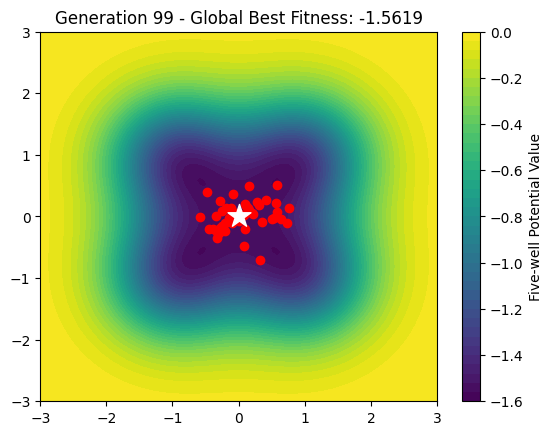

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Five-well potential functionの定義
def five_well_potential(X):
    x, y = X[0], X[1]
    term1 = np.exp(-((x - 1)**2 + (y - 1)**2))
    term2 = np.exp(-((x + 1)**2 + (y - 1)**2))
    term3 = np.exp(-((x - 1)**2 + (y + 1)**2))
    term4 = np.exp(-((x + 1)**2 + (y + 1)**2))
    term5 = np.exp(-0.5 * (x**2 + y**2))
    return - (term1 + term2 + term3 + term4 + term5)

# DEAアルゴリズムの実装
def diffusion_evolution(pop_size, dim, generations, fitness_func, alpha_schedule, sigma):
    # 初期化 - 集団をランダムに初期化
    population = np.random.randn(pop_size, dim)*10 + 3  # 初期集団は正規分布から生成
    all_generations = []  # 全世代のデータを保存するリスト
    
    for t in range(generations):
        # フィットネス評価 - 各個体のフィットネススコアを計算
        fitness_scores = np.array([fitness_func(ind) for ind in population])
        
        # 現在の世代におけるアルファ値を取得
        alpha_t = alpha_schedule(t, generations)
        
        # 重み付き平均の計算のために、正規化定数Zを計算
        Z = np.sum([np.exp(-fitness_scores[j]) for j in range(pop_size)])
        
        new_population = []  # 新しい個体群を保存するリスト
        
        # 各個体を次の世代に向けて進化させる
        for i in range(pop_size):
            # 近傍の個体をランダムに選択して、推定する高フィットネス個体の計算
            neighbors = np.random.choice(range(pop_size), size=pop_size//2, replace=False)
            
            # 重み付き平均に基づいて高フィットネス解を推定
            weighted_avg = np.sum([population[j] * np.exp(-fitness_scores[j]) for j in neighbors], axis=0) / Z
            
            # ランダムなノイズを加えて新しい個体を生成
            noise = np.random.randn(dim) * sigma
            new_ind = alpha_t * weighted_avg + (1 - alpha_t) * population[i] + noise
            
            # 新しい個体を次世代の集団に追加
            new_population.append(new_ind)
        
        # 現在の世代の集団を保存
        population = np.array(new_population)
        for ind in population:
            all_generations.append([t, ind[0], ind[1], fitness_func(ind)])  # フィットネススコアも保存
    
    # データをPandas DataFrameに変換しCSVに保存
    df = pd.DataFrame(all_generations, columns=['Generation', 'X', 'Y', 'Fitness'])
    df.to_csv('gen.csv', index=False)
    
    return population

# パラメータ設定
pop_size = 50       # 集団サイズ（個体数）
dim = 2             # 次元（Five-well potential functionは2次元で実行）
generations = 100   # 世代数（進化のステップ数）
sigma = 0.1         # ノイズの大きさ（突然変異の大きさ）

# アルファのスケジュール（時間経過とともに探索範囲を狭める）
def alpha_schedule(t, generations):
    return 1 - t / generations  # 線形にアルファ値を減らす

# DEAを実行して最適化を行う
final_population = diffusion_evolution(pop_size, dim, generations, five_well_potential, alpha_schedule, sigma)

# CSVファイルの読み込み
df = pd.read_csv('gen.csv')

# GIF作成のための可視化関数を定義
fig, ax = plt.subplots()
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = np.array([five_well_potential([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

# 最適解と局所最適解の座標
global_optimal_solution = (0, 0)  # グローバル最適解
local_optimal_solutions = [(1, 1), (-1, 1), (1, -1), (-1, -1)]  # 局所最適解

print(f"Global Optimal Solution: {global_optimal_solution} f={five_well_potential(global_optimal_solution)}")
print(f"Local Optimal Solutions1: {local_optimal_solutions[0]} f={five_well_potential(local_optimal_solutions[0])}")
print(f"Local Optimal Solutions2: {local_optimal_solutions[1]} f={five_well_potential(local_optimal_solutions[1])}")
print(f"Local Optimal Solutions3: {local_optimal_solutions[2]} f={five_well_potential(local_optimal_solutions[2])}")
print(f"Local Optimal Solutions4: {local_optimal_solutions[3]} f={five_well_potential(local_optimal_solutions[3])}")

# 初期設定の描画
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
scat = ax.scatter([], [], color='red')

# グローバル最適解を星マークで描画
global_opt_scat = ax.scatter(global_optimal_solution[0], global_optimal_solution[1],
                             color='white', marker='*', s=300, label='Global Optimal Solution')

# 局所最適解をダイヤモンドマークで描画
# local_opt_scat = ax.scatter([x[0] for x in local_optimal_solutions], [x[1] for x in local_optimal_solutions],
                            # color='yellow', marker='D', s=200, label='Local Optimal Solutions')

# カラーバーを追加
cbar = fig.colorbar(contour)
cbar.set_label('Five-well Potential Value')

# グローバルベストを追跡する変数
global_best = np.inf

# 更新関数
def update(frame):
    global global_best
    current_gen = df[df['Generation'] == frame]
    current_best = current_gen['Fitness'].min()
    
    # 各世代までのグローバルベストを更新
    if current_best < global_best:
        global_best = current_best
    
    # 現在の世代の個体をプロット
    scat.set_offsets(current_gen[['X', 'Y']].values)
    
    # タイトルを世代数とグローバルベストの値に更新
    ax.set_title(f'Generation {frame} - Global Best Fitness: {global_best:.4f}')
    
    return scat,

# アニメーションを作成
ani = FuncAnimation(fig, update, frames=range(generations), repeat=False)

# GIFとして保存
ani.save('diffusion_evolution_five_well_potential_with_optimal_solutions.gif', writer='imagemagick')

plt.show()


In [7]:
A = [[1] * 3 for _ in range(3)]
B = [[2] * 3 for _ in range(3)]

In [8]:
from sklearn.metrics.pairwise import cosine_similarity 

a = A[0]
b = B[0]

# コサイン類似度を計算
cosine_similarity([a], [b])

array([[1.]])

In [9]:
cosine_similarity(A, B)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [1]:
A = [[100, 100, 100], [1, 1, 1], [1, 1, 1]]
B = [[-100, -100, -100], [-3, -3, -3], [-2, -2, -2], [-1, -1, -1], [1, 1, 1], [2, 2, 2], [3, 3, 3]]

In [40]:
#ユークリッド距離+コサイン類似度
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

alpha = 0.5

# ユークリッド距離を計算
euclidean = euclidean_distances(A, B)

# コサイン類似度を計算
cosine = cosine_similarity(A, B)

# ユークリッド距離とコサイン類似度の加重平均を計算
weighted_similarity = alpha * (1 + cosine) + (1 - alpha) * (2 / (2 + euclidean))

print("A", A)
print("B", B)
print()
print("Euclidean Distance:")
print(euclidean)
print("Cosine Similarity:")
print(cosine)
print("Weighted Similarity:")
print(weighted_similarity)

A [[100, 100, 100], [1, 1, 1], [1, 1, 1]]
B [[-100, -100, -100], [-3, -3, -3], [-2, -2, -2], [-1, -1, -1], [1, 1, 1], [2, 2, 2], [3, 3, 3]]

Euclidean Distance:
[[346.41016151 178.40123318 176.66918237 174.93713156 171.47302995
  169.74097914 168.00892833]
 [174.93713156   6.92820323   5.19615242   3.46410162   0.
    1.73205081   3.46410162]
 [174.93713156   6.92820323   5.19615242   3.46410162   0.
    1.73205081   3.46410162]]
Cosine Similarity:
[[-1. -1. -1. -1.  1.  1.  1.]
 [-1. -1. -1. -1.  1.  1.  1.]
 [-1. -1. -1. -1.  1.  1.  1.]]
Weighted Similarity:
[[0.00287018 0.0055432  0.00559694 0.00565172 1.00576458 1.00582272
  1.00588204]
 [0.00565172 0.11200462 0.13896315 0.1830127  1.5        1.26794919
  1.1830127 ]
 [0.00565172 0.11200462 0.13896315 0.1830127  1.5        1.26794919
  1.1830127 ]]


In [41]:
import numpy as np

a = np.array(A[0])
b = np.array(B[0])
cosine_similarity(a.reshape(1, -1), b.reshape(1, -1))[0][0]
euclidean_distances(a.reshape(1, -1), b.reshape(1, -1))[0][0]

346.41016151377545

In [42]:
# 類似度の変化
import numpy as np
base = np.array([1, 1, 1])
b = np.array([1, 1, 1])
sims = []
euclideans = []
weights = []

for i in range(-100, 101):
    vec = b*i
    sim = cosine_similarity(base.reshape(1, -1), vec.reshape(1, -1))[0][0]
    euclidean = euclidean_distances(base.reshape(1, -1), vec.reshape(1, -1))[0][0]
    weight = 0.5 * sim + 0.5 * (1 / (1 + euclidean))
    sims.append(sim)
    euclideans.append(euclidean)
    weights.append(weight)

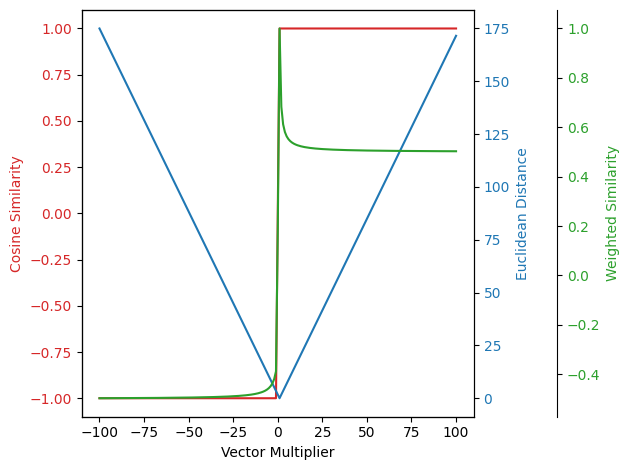

In [43]:
import matplotlib.pyplot as plt

# コサイン類似度とユークリッド距離, 重み付き類似度の変化をプロット

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Vector Multiplier')
ax1.set_ylabel('Cosine Similarity', color=color)
ax1.plot(range(-100, 101), sims, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Euclidean Distance', color=color)
ax2.plot(range(-100, 101), euclideans, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()
color = 'tab:green'
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Weighted Similarity', color=color)
ax3.plot(range(-100, 101), weights, color=color)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

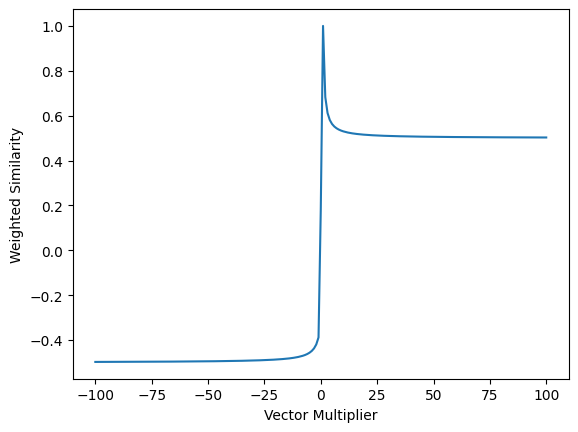

In [44]:
#weighte similarityの変化
plt.plot(range(-100, 101), weights)
plt.xlabel('Vector Multiplier')           
plt.ylabel('Weighted Similarity')
plt.show()

In [69]:
# 類似度の変化
import numpy as np
base = np.array([1, 1, 1])
b = np.array([-1, -1, -3000])
sims = []
euclideans = []
weights = []

for i in np.arange(-1, 1, 0.01):
    vec = b*i
    sim = cosine_similarity(base.reshape(1, -1), vec.reshape(1, -1))[0][0]
    euclidean = euclidean_distances(base.reshape(1, -1), vec.reshape(1, -1))[0][0]
    weight = 0.5 * (1+sim) + 0.5 * (2 / (2 + euclidean))
    # weight = 0.5 * (sim) + 0.5 * (1 / (1 + euclidean))
    sims.append(sim)
    euclideans.append(euclidean)
    weights.append(weight)

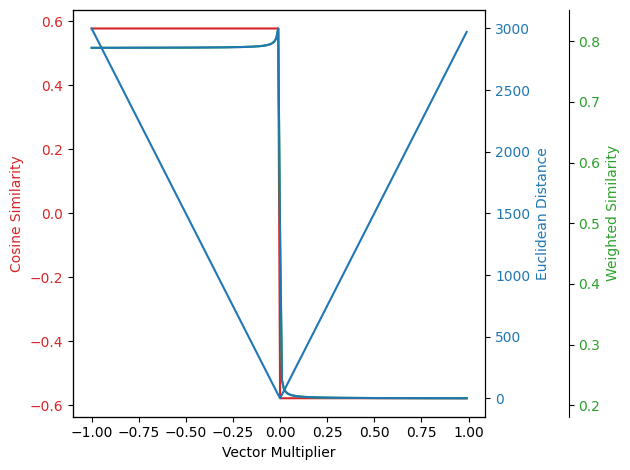

In [70]:
import matplotlib.pyplot as plt

# コサイン類似度とユークリッド距離, 重み付き類似度の変化をプロット

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Vector Multiplier')
ax1.set_ylabel('Cosine Similarity', color=color)
ax1.plot(np.arange(-1, 1, 0.01), sims, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Euclidean Distance', color=color)
ax2.plot(np.arange(-1, 1, 0.01), euclideans, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()
color = 'tab:green'
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Weighted Similarity', color=color)
ax3.plot(np.arange(-1, 1, 0.01), weights, color=color)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

#weighte similarityの変化
plt.plot(np.arange(-1, 1, 0.01), weights)
plt.xlabel('Vector Multiplier')
plt.ylabel('Weighted Similarity')
plt.show()

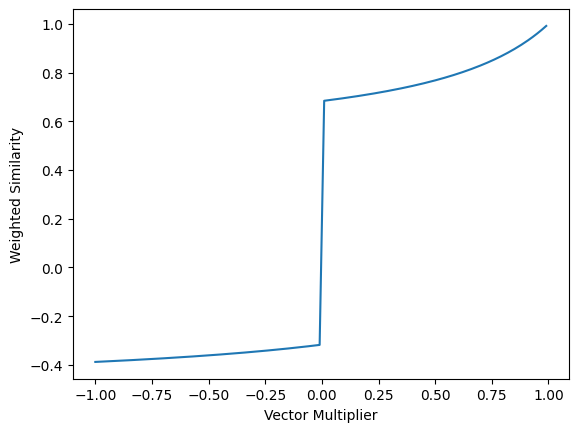

In [47]:
# 重み付き類似度の変化
import matplotlib.pyplot as plt

# 重み付き類似度の変化をプロット
plt.plot(np.arange(-1, 1, 0.01), weights)
plt.xlabel('Vector Multiplier')
plt.ylabel('Weighted Similarity')
plt.show()

In [80]:
A = [[1, 1, 1], [-1, -1, -1], [100, 100, 100]]
B = [[1, 1, 1], [-1, -1, -1]]

sim = cosine_similarity(A, B)
print("sim:\n", sim)

euclidean = euclidean_distances(A, B)
print("euclidean:\n", euclidean)

alpha = 0.5
weighted_similarity = alpha * (1 + sim) + (1 - alpha) * (1 / (1 + euclidean))
print("weighted_similarity:\n", weighted_similarity)

sim:
 [[ 1. -1.]
 [-1.  1.]
 [ 1. -1.]]
euclidean:
 [[  0.           3.46410162]
 [  3.46410162   0.        ]
 [171.47302995 174.93713156]]
weighted_similarity:
 [[1.5        0.11200462]
 [0.11200462 1.5       ]
 [1.002899   0.00284192]]


In [81]:
A_array = np.array(A)
B_array = np.array(B)

In [85]:
print("A_array:\n", A_array)
print("B_array:\n", B_array)

A_array:
 [[  1   1   1]
 [ -1  -1  -1]
 [100 100 100]]
B_array:
 [[ 1  1  1]
 [-1 -1 -1]]


In [84]:
# ベクトルの大きさ
norm_A = np.linalg.norm(A_array, axis=1)
norm_B = np.linalg.norm(B_array, axis=1)

# 大きさの比の行列を計算　min(A, B) / max(A, B)
norm_ratio = np.minimum(norm_A[:, None], norm_B) / np.maximum(norm_A[:, None], norm_B)

print("norm_A:", norm_A)
print("norm_B:", norm_B)
print("norm_ratio:\n", norm_ratio)

norm_A: [  1.73205081   1.73205081 173.20508076]
norm_B: [1.73205081 1.73205081]
norm_ratio:
 [[1.   1.  ]
 [1.   1.  ]
 [0.01 0.01]]


In [79]:
# コサイン類似度
sim = cosine_similarity(A_array, B_array)
print("sim:\n", sim)

sim:
 [[ 1.]
 [-1.]
 [ 1.]]


In [86]:
# 類似度 = 0.5*コサイン類似度 + 0.5*大きさの比
alpha = 0.5

weighted_similarity = alpha * (1 + sim)/2 + (1 - alpha) * norm_ratio

print("weighted_similarity:\n", weighted_similarity)

weighted_similarity:
 [[1.    0.5  ]
 [0.5   1.   ]
 [0.505 0.005]]


In [172]:
# 類似度の変化
import numpy as np
import math
base = np.array([1, 2, 3])
b = np.array([1, 2, 3])
weights = []

for i in np.arange(-50, 50, 0.05):
    vec = b*i
    if math.isclose(np.linalg.norm(base), 0.0, abs_tol=1e-10) and math.isclose(np.linalg.norm(vec), 0.0, abs_tol=1e-10):
        print("Both norm is 0")
        weight = 1.0
    elif math.isclose(np.linalg.norm(base), 0.0, abs_tol=1e-10) or math.isclose(np.linalg.norm(vec), 0.0, abs_tol=1e-10):
        print("One of norm is 0")
        weight = 0.0
    else:
        sim = cosine_similarity([base], [vec])[0][0]
        norm_ratio = np.minimum(np.linalg.norm(base), np.linalg.norm(vec)) / np.maximum(np.linalg.norm(base), np.linalg.norm(vec))
        weight = 0.5 * (1 + sim)/2 + 0.5 * norm_ratio
    weights.append(weight)

One of norm is 0


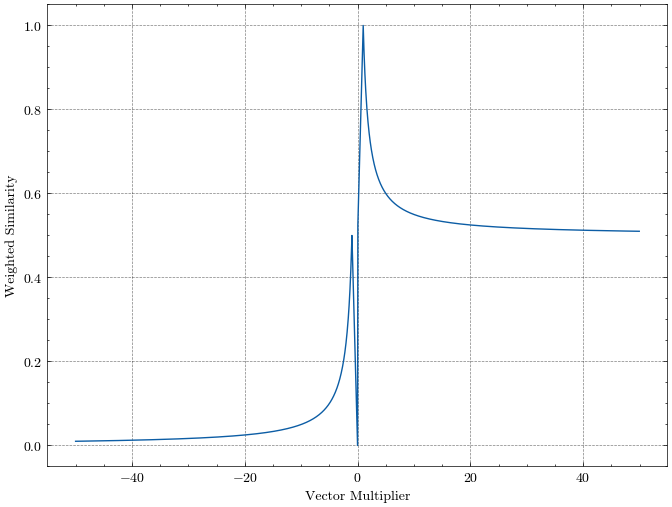

In [173]:
# 重み付き類似度の変化
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'grid', 'no-latex'])
plt.figure(figsize=(8, 6))

# 重み付き類似度の変化をプロット
plt.plot(np.arange(-50, 50, 0.05), weights)
plt.xlabel('Vector Multiplier')
plt.ylabel('Weighted Similarity')
plt.show()

In [174]:
base = np.array([1, 2, 3])
b = np.array([1, 2, 3])

result = [1.0]

for i in range(3):
    b[i] = -1 * b[i]
    sim = cosine_similarity([base], [b])[0][0]
    norm_ratio = np.minimum(np.linalg.norm(base), np.linalg.norm(b)) / np.maximum(np.linalg.norm(base), np.linalg.norm(b))
    weight = 0.5 * (1 + sim)/2 + 0.5 * norm_ratio

    result.append(weight)

print(result)

[1.0, 0.9642857142857143, 0.8214285714285714, 0.5]
